<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>

<h1>Lab - Image Compression and Color Quantization using K Means Clustering</h1>
<p><b>Welcome!</b> This lab is about compressing the size of images using a technique called K Means Clustering. We will compress images using K Means Clustering in the Python Programming Language. After completing this lab, you will:</p>
<h5> 1. Learn to download and read images using OpenCV </h5>
<h5> 2. Know about image compression and its Importance </h5>
<h5> 3. Compress image sizes by upto 90%!! </h5>
<h5> 4. Compress images using a technique called K Means Clustering</h5>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <br>
    <br>
    <h2>Table of Contents</h2>
    <ul>
        <li><a href="#ref0">What is an image comprised of?</a></li>
        <li><a href="#ref1">Image Compression and its importance</a></li>
        <li><a href="#ref2">What is K Means Clustering</a></li>
        <li><a href="#ref3">Compressing Images using K Means Clustering</a></li>
        <li><a href="#ref4">Exercises</a></li>
    </ul>
    <br>
    <p>Estimated Time Needed: <strong>1 hr 30 min</strong></p>
</div>

<hr>

<a id="ref0"></a>
<h2 align="center">What is an image comprised of?</h2>

<p>The basic building block of any picture is a pixel. If we zoom in on any picture, we can start to see the pixels and the pixels the image is comprised of.</p>

<p>Let's start by downloading an image of a bunny. We will use the same technique to download an image as we learnt in the lab of Classifying Images using IBM Watson Visual Recognition in Python</p>

In [1]:
# importing OpenCV and urllib for downloading and displaying the bunny image
import urllib.request
import cv2
bunny_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
urllib.request.urlretrieve(bunny_image_url, "bunny.png") # downloads file as "bunny.png"
im = cv2.imread("bunny.png")

In [2]:
# loading standard python modules
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

Original size of bunny's image is: 630 Kilo Bytes


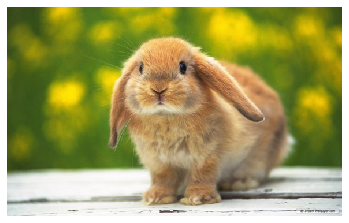

In [3]:
# We read a bunny image here and display it
img_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_corrected)
print("Original size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('bunny.png').st_size)/1000))))

<b>What is a pixel?</b>
<p>To form any visible color, we need the three primary colors (i.e Red, Green and Blue). Mixing these colors in various proportions provides us with all colors of the visible spectrum. Interpreting this in the computer's technology, each pixel is comprised of 3 channels - i.e. Red, Green and Blue. Each of these channels has an intensity value that ranges between 0 - 255. From combinatorics we know that the total number of colors we can represent in each pixel are 256 x 256 x 256. Since each channel in a pixel can have 256 = 2^8 possible values, each channel requires 8 bits of memory to store in a computer memory. Thus, each pixel requires 8 + 8 + 8 = 24 bits of memory for storage</p>

<p>Now, let's focus on the bunny's image. The image has a total of 209960 pixels and since each pixel required 24 bits to store, the image has an original size of 209960 x 24 bits. Doing some math magic, in Kilo Bytes this is equal to ((209960 x 24) / 8) / 1000 ~ 630 Kilo Bytes</p>

<a id="ref1"></a>
<h2 align="center">Image Compression and its Importance</h2>

<p>Image compression is about compressing the size of images. This is important since we can store these images more efficiently and save space, bandwidth and time of the computer network. Further, this would also save money to store images on computers and phones since a lot more images can now be stored (due to their compressed size) with the same amount of storage space. We will compress the size of the images using a technique called K - Means clustering.</p>

<a id="ref2"></a>
<h2 align="center">What is K Means Clustering</h2>

<p>As the name suggests, K Means Clustering is a technique by which we can split a bunch of data points into various clusters (specifically K clusters). The data points are clustered together based upon a certain similarity. K here represents the number of clusters the data points are split into. The "Means" in K Means refers to finding the centroid of each of the K clusters. Run the code cell below to see a visual reperesentation of running K Means clustering technique on a bunch of randomly generated data points:</p>

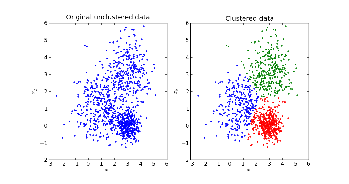

In [4]:
k_means_url = "http://i.stack.imgur.com/cIDB3.png"
urllib.request.urlretrieve(k_means_url, "K_Means_clustering.png") # downloads file as "K_Means_clustering.png"
k_means_im = cv2.imread("K_Means_clustering.png")
k_means_im_corrected = cv2.cvtColor(k_means_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(k_means_im_corrected)

<p>To perform K Means clustering we have the following steps:</p>
<0l>
    <li>Intially choose K points amongst the given set of data points. These K points represent the centroids of the K clusters</li>
    <li>Next, assign each data point to the cluster whose center is nearest to it</li>
    <li>New centroids are calculated for each of the K clusters based upon the data points that are assigned in that cluster</li>
</ol>
<br>
<p>Step 2 and 3 are repeated until the centroids stop moving or the defined number of iterations are completed. </p>

<p>For our use case of image compression, our data points are the pixels in our image, and we are trying to group pixels of similar color together in K clusters (for e.g. K = 8 clusters) i.e. 8 different colors. Thus, instead of each pixel originally representing 256 x 256 x 256 colors, each pixel can now only represent 8 possible colors. Therefore, each pixel now only requires 3 bits of memory for storage (since 2^3 = 8) instead of the original 24 bits. This technique of breaking all possible colors of the RGB color space over K colors is called <b>Color Quantization</b>.</p> 
<p>The K centroids of the clusters are representive of the three dimensional RGB color space and would replace the colors of all points in their cluster and thus the image will only have K colors in it.</p>

<a id="ref3"></a>
<h2 align="center">Compressing Images using K Means Clustering</h2>

In [5]:
# We are using the sklearn python module and are importing the in built KMeans
# function from it
from sklearn.cluster import KMeans

In [6]:
# we import numpy here to transform image dimensions
import numpy as np

In [7]:
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

In [8]:
# Perform KMeans to compress image, here K = 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);    

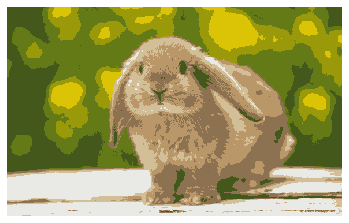

In [9]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_bunny.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_bunny.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected)    

In [10]:
print("Compressed size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_bunny.png').st_size)/1000))))

Compressed size of bunny's image is: 48 Kilo Bytes


<p>Thus, we see that we have compressed the bunny's image size to <b>48  Kilo Bytes</b> from the original <b>630 Kilo Bytes</b></p>

<h4>Woah! We have compressed the size of the bunny's <b>image by **92%</b></h4>

<a id="ref4"></a>
<h2 align="center">Exercises</h2>

<h2>Exercise 1</h2>

<p>Below, I have provided a few pictures for you to play with. Feel free to use K Means Clustering (try it out with different values of K) to compress an image. Notice how the image size varies when you increase the value of K.</p>

Original size of fish image is: 865 Kilo Bytes


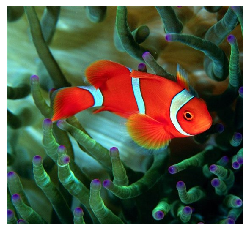

In [23]:
# We read a fish image here and display it
fish_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/fish.png"
urllib.request.urlretrieve(fish_image_url, "fish.png") # downloads file as "fish.png"
im2 = cv2.imread("fish.png")
fish_im_corrected = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(fish_im_corrected)
print("Original size of fish image is: {} Kilo Bytes".format(str(math.ceil((os.stat('fish.png').st_size)/1000))))

In [24]:
# Write your code here to Perform K Means Clustering on the fish image 
# (stored in variable im2) and compress its size 
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im2.shape[0]
num_cols = im2.shape[1]
transform_image_for_KMeans = im2.reshape(num_rows * num_cols, 3)


In [25]:
# Perform KMeans to compress image, here K = 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

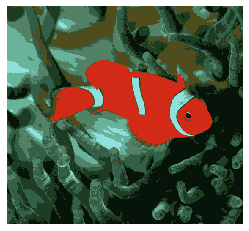

In [26]:
# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);    


compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_fish.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_fish.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected) 

In [27]:
print("Compressed size of fish's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_fish.png').st_size)/1000))))

Compressed size of fish's image is: 99 Kilo Bytes


<h4>Click <i>here</i> to view the solution</h4>

<!---

Extracting num_rows and num_cols from fish image


num_rows_fish = im2.shape[0]
num_cols_fish = im2.shape[1]
transform_fish_image_for_KMeans = im2.reshape(num_rows_fish * num_cols_fish, 3)


Perform KMeans to compress fish image here, feel free to choose
any value for K, (i.e. K < 256) for compressing the image size. Use the value
of K to fill the value of n_clusters


kmeans_fish = KMeans(n_clusters=)
kmeans_fish.fit(transform_fish_image_for_KMeans)
cluster_centroids_fish = np.asarray(kmeans_fish.cluster_centers_,dtype=np.uint8) 


labels represent the label of each pixel and which cluster it belongs to


labels_fish = np.asarray(kmeans_fish.labels_,dtype=np.uint8 )  
labels_fish = labels_fish.reshape(num_rows_fish,num_cols_fish)

After running the above code, run the code below
   

compressed_image_fish = np.ones((num_rows_fish, num_cols_fish, 3), dtype=np.uint8)
for r in range(num_rows_fish):
    for c in range(num_cols_fish):
        compressed_image_fish[r, c, :] = cluster_centroids_fish[labels_fish[r, c], :]
cv2.imwrite("compressed_fish.png", compressed_image_fish)
compressed_fish_im = cv2.imread('compressed_fish.png')
compressed_fish_im_corrected = cv2.cvtColor(compressed_fish_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_fish_im_corrected) 
print("Compressed size of fish image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_fish.png').st_size)/1000))))


--->


<h2>Exercise 2</h2>

Original size of butterfly image is: 1008 Kilo Bytes


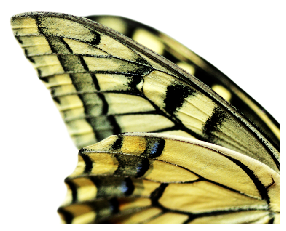

In [28]:
# We read a butterfly image here and display it
butterfly_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/butterfly.png"
urllib.request.urlretrieve(butterfly_image_url, "butterfly.png") # downloads file as "butterfly.png"
im3 = cv2.imread("butterfly.png")
butterfly_im_corrected = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(butterfly_im_corrected)
print("Original size of butterfly image is: {} Kilo Bytes".format(str(math.ceil((os.stat('butterfly.png').st_size)/1000))))

In [29]:
# Write your code here to Perform K Means Clustering on the butterfly image 
# (stored in variable im3) and compress its size


# Write your code here to Perform K Means Clustering on the fish image 
# (stored in variable im2) and compress its size 
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im3.shape[0]
num_cols = im3.shape[1]
transform_image_for_KMeans = im3.reshape(num_rows * num_cols, 3)



In [30]:
# Perform KMeans to compress image, here K = 8 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 

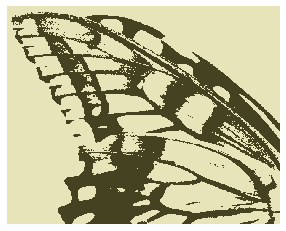

In [31]:
# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);    


compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

cv2.imwrite("compressed_butterfly.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_butterfly.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected) 

In [32]:
print("Compressed size of butterfly's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_butterfly.png').st_size)/1000))))

Compressed size of butterfly's image is: 31 Kilo Bytes


<h4>Click <i>here</i> to view the solution</h4>

<!---

Extracting num_rows and num_cols from butterfly image


num_rows_butterfly = im3.shape[0]
num_cols_butterfly = im3.shape[1]
transform_butterfly_image_for_KMeans = im3.reshape(num_rows_butterfly * num_cols_butterfly, 3)


Perform KMeans to compress butterfly image here, feel free to choose
any value for K, (i.e. K < 256) for compressing the image size. Use the value
of K to fill the value of n_clusters**


kmeans_butterfly = KMeans(n_clusters=)
kmeans_butterfly.fit(transform_butterfly_image_for_KMeans)
cluster_centroids_butterfly = np.asarray(kmeans_butterfly.cluster_centers_,dtype=np.uint8) 


labels represent the label of each pixel and which cluster it belongs to


labels_butterfly = np.asarray(kmeans_butterfly.labels_,dtype=np.uint8 )  
labels_butterfly = labels_butterfly.reshape(num_rows_butterfly,num_cols_butterfly)


After running the above code, run the code below


compressed_image_butterfly = np.ones((num_rows_butterfly, num_cols_butterfly, 3), dtype=np.uint8)
for r in range(num_rows_butterfly):
    for c in range(num_cols_butterfly):
        compressed_image_butterfly[r, c, :] = cluster_centroids_butterfly[labels_butterfly[r, c], :]
cv2.imwrite("compressed_image_butterfly.png", compressed_image_butterfly)
compressed_butterfly_im = cv2.imread('compressed_image_butterfly.png')
compressed_butterfly_im_corrected = cv2.cvtColor(compressed_butterfly_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_butterfly_im_corrected)
print("Compressed size of butterfly image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_image_butterfly.png').st_size)/1000))))

--->

<h1>Thank you for completing this lab!</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cocl.us/NotebooksPython101bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>

<h3>About the Authors:</h3>

This lab was written by <a href="https://www.linkedin.com/in/sacchitchadha/" target="_blank" >Sacchit Chadha</a>.

<p><a href="https://www.linkedin.com/in/sacchitchadha/" target="_blank">Sacchit Chadha</a> is a Software Engineer at IBM, and is a rising senior pursuing a Bachelors Degree in Computer Science from the University of Waterloo. His work at IBM is focused on Computer Vision, Cloud Computing and Blockchain.</p>

<hr>
<p>Copyright &copy; 2019 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>